# SECTION 1a:  Analyse the data type

In [3]:
#Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

In [4]:
# Reading The Data to the notebook
df = pd.read_csv("Churn_Modelling_26.csv")

In [5]:
# Checking the first 10 observations
df.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0        1.0  15634602.0  Hargrave        619.0    France  Female  42.0   
1        2.0  15647311.0      Hill        608.0     Spain  Female  41.0   
2        3.0  15619304.0      Onio        502.0    France  Female  42.0   
3        4.0  15701354.0      Boni        699.0    France  Female  39.0   
4        5.0  15737888.0  Mitchell        850.0     Spain  Female  43.0   
5        6.0  15574012.0       Chu        645.0     Spain    Male  44.0   
6        7.0  15592531.0  Bartlett        822.0    France    Male  50.0   
7        8.0  15656148.0    Obinna        376.0   Germany  Female  29.0   
8        9.0  15792365.0        He        501.0    France    Male  44.0   
9       10.0  15592389.0        H?        684.0    France    Male  27.0   

   Tenure    Balance  NumOfProducts  EstimatedSalary  Unnamed: 11 HasCrCard  \
0     2.0       0.00            1.0        101348.88          NaN       Yes   
1     1.0   83807.86            1.0        112542.58          NaN        No   
2     8.0  159660.80            3.0        113931.57          NaN       Yes   
3     1.0       0.00            2.0         93826.63          NaN        No   
4     2.0  125510.82            1.0         79084.10          NaN       Yes   
5     8.0  113755.78            2.0        149756.71          NaN       Yes   
6     7.0       0.00            2.0         10062.80          NaN       Yes   
7     4.0  115046.74            4.0        119346.88          NaN       Yes   
8     4.0  142051.07            2.0         74940.50          NaN        No   
9     2.0  134603.88            1.0         71725.73          NaN       Yes   

  IsActiveMember  Churn  
0            Yes    1.0  
1            Yes    0.0  
2             No    1.0  
3             No    0.0  
4            Yes    0.0  
5             No    1.0  
6            Yes    0.0  
7             No    1.0  
8            Yes    0.0  
9            Yes    0.0

In [6]:
#checking the last 10 observations
df.tail(10)

RowNumber  CustomerId      Surname  CreditScore Geography  Gender  \
9991      9992.0  15769959.0  Ajuluchukwu        597.0    France  Female   
9992      9993.0  15657105.0  Chukwualuka        726.0     Spain    Male   
9993      9994.0  15569266.0       Rahman        644.0    France    Male   
9994      9995.0  15719294.0         Wood        800.0    France  Female   
9995      9996.0  15606229.0     Obijiaku        771.0    France    Male   
9996      9997.0  15569892.0    Johnstone        516.0    France    Male   
9997      9998.0  15584532.0          Liu        709.0    France  Female   
9998      9999.0  15682355.0    Sabbatini        772.0   Germany    Male   
9999     10000.0  15628319.0       Walker        792.0    France  Female   
10000        NaN         NaN          NaN          NaN       NaN     NaN   

        Age     Tenure    Balance  NumOfProducts  EstimatedSalary  \
9991   53.0   4.000000   88381.21            1.0         69384.71   
9992   36.0   2.000000       0.00            1.0        195192.40   
9993   28.0   7.000000  155060.41            1.0         29179.52   
9994   29.0   2.000000       0.00            2.0        167773.55   
9995   39.0   5.000000       0.00            2.0         96270.64   
9996   35.0  10.000000   57369.61            1.0        101699.77   
9997   36.0   7.000000       0.00            1.0         42085.58   
9998   42.0   3.000000   75075.31            2.0         92888.52   
9999   28.0   4.000000  130142.79            1.0         38190.78   
10000   NaN   5.012814        NaN            NaN              NaN   

       Unnamed: 11 HasCrCard IsActiveMember  Churn  
9991           NaN       Yes             No    1.0  
9992           NaN       Yes             No    0.0  
9993           NaN       Yes             No    0.0  
9994           NaN        No             No    0.0  
9995           NaN       Yes             No    0.0  
9996           NaN       Yes            Yes    0.0  
9997           NaN        No            Yes    1.0  
9998           NaN       Yes             No    1.0  
9999           NaN       Yes             No    0.0  
10000          NaN       NaN            NaN    NaN

In [7]:
df.describe()

RowNumber    CustomerId   CreditScore           Age       Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  9990.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800     5.012814   
std     2886.89568  7.193619e+04     96.653299     10.487806     2.893622   
min        1.00000  1.556570e+07    350.000000     18.000000     0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000     3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000     5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000     8.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000    10.000000   

             Balance  NumOfProducts  EstimatedSalary  Unnamed: 11  \
count   10000.000000   10000.000000     10000.000000          0.0   
mean    76485.889288       1.530200    100090.239881          NaN   
std     62397.405202       0.581654     57510.492818          NaN   
min         0.000000       1.000000        11.580000          NaN   
25%         0.000000       1.000000     51002.110000          NaN   
50%     97198.540000       1.000000    100193.915000          NaN   
75%    127644.240000       2.000000    149388.247500          NaN   
max    250898.090000       4.000000    199992.480000          NaN   

              Churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [8]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0        1.0  15634602.0  Hargrave        619.0    France  Female  42.0   
1        2.0  15647311.0      Hill        608.0     Spain  Female  41.0   
2        3.0  15619304.0      Onio        502.0    France  Female  42.0   
3        4.0  15701354.0      Boni        699.0    France  Female  39.0   
4        5.0  15737888.0  Mitchell        850.0     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  EstimatedSalary  Unnamed: 11 HasCrCard  \
0     2.0       0.00            1.0        101348.88          NaN       Yes   
1     1.0   83807.86            1.0        112542.58          NaN        No   
2     8.0  159660.80            3.0        113931.57          NaN       Yes   
3     1.0       0.00            2.0         93826.63          NaN        No   
4     2.0  125510.82            1.0         79084.10          NaN       Yes   

  IsActiveMember  Churn  
0            Yes    1.0  
1            Yes    0.0  
2             No    1.0  
3             No    0.0  
4            Yes    0.0

In [9]:
# Checking the data types
df.dtypes

RowNumber          float64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
EstimatedSalary    float64
Unnamed: 11        float64
HasCrCard           object
IsActiveMember      object
Churn              float64
dtype: object

In [10]:
#Changing Object data type to category
ObjList = df.columns[df.dtypes == "object"].tolist()
for i in ObjList:
    df[i] = df[i].astype("category")

In [11]:
# Changing float type to integer for the below varibales
#floatlist = ["RowNumber", "CustomerId", "CreditScore", "Age", "Tenure", "NumOfProducts"]
#df[floatlist] =df[floatlist].astype("int")

#Churn should be treated as categorical
df.Churn = df.Churn.astype("category")

In [12]:
#Checking the changes made on the data type
df.dtypes

RowNumber           float64
CustomerId          float64
Surname            category
CreditScore         float64
Geography          category
Gender             category
Age                 float64
Tenure              float64
Balance             float64
NumOfProducts       float64
EstimatedSalary     float64
Unnamed: 11         float64
HasCrCard          category
IsActiveMember     category
Churn              category
dtype: object

# Section 1b: Handlling Missing Values

In [13]:
#Checking for variables with missing values
df.isna().sum()

RowNumber              1
CustomerId             1
Surname                1
CreditScore            1
Geography              1
Gender                 1
Age                    1
Tenure                11
Balance                1
NumOfProducts          1
EstimatedSalary        1
Unnamed: 11        10001
HasCrCard              1
IsActiveMember         1
Churn                  1
dtype: int64

In [14]:
#Checking the record with missing obsevation in almost all the varables
df.isna().sum(axis=1)

0         1
1         1
2         1
3         1
4         1
         ..
9996      1
9997      1
9998      1
9999      1
10000    14
Length: 10001, dtype: int64

In [15]:
#As we have in the data, a column(unnamed: 11) is having missing observations all the records, also the record number 10000 is having missing values for 13 variables out 14

#dropping Unnamed: 11 variable
df.dropna(how = "all", axis =1, inplace = True)

# Droppring row with empty ID
df.dropna(subset = ["RowNumber"], how = "any", inplace = True)


In [16]:
#Checking the dataframe
df.isna().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure             11
Balance             0
NumOfProducts       0
EstimatedSalary     0
HasCrCard           0
IsActiveMember      0
Churn               0
dtype: int64

In [17]:
#Handling missing value for Tenure
#Repacing missing observations in the Tenure by the mean
df.Tenure = df.Tenure.fillna(value = round(df.Tenure.mean()) )

In [18]:
df.Tenure.describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

In [19]:
#checking the dimension of our data frame based on the recent changes
df.shape

(10000, 14)

In [20]:
#Checking the data based on the recent changes
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
EstimatedSalary    0
HasCrCard          0
IsActiveMember     0
Churn              0
dtype: int64

# OBSERVATION

From this section, we were able to describe the data and analyze the data type.

We checked the data types of our data and all the object variables were converted to the category variables accordingly

We found the missing values and dealt with them, we discovered a column having all records empty, we also discovered a record with no identifier, all of these were cleaned up in the data,  we also discovered some missing values for a variable("Tenure"),  this was extrapolated accordingly.

At the end of this section, no variables were having mssing values again, no variables were having object type and the dimension of our final data set is 10000 records and 14 variables

# Section 2: Checking for duplicates

In [21]:
#Checking for duplicates records
df.duplicated().sum()

0

In [22]:
#Checking for duplicates observation for unique Identifiers RowNumber
df["RowNumber"].nunique() != df.shape[0]

False

In [23]:
#Checking for duplicates observation for unique Identifiers Customer ID
df["CustomerId"].nunique() != df.shape[0]

False

In [24]:
#Resetting Index to RowNumber
df.reset_index = df.RowNumber

# OBSERVATIONS

There were no duplicate found in the data, we checked for the duplicates  for all the variables and we also checked duplicates within RowNumber and CustomerID being an Identifier variables

# Section 2b: Outlier detection

In [25]:
#Checking for outliers with boxplot, identifying the numeric variables first. 
#Remember RowNumber and CustomerID are just Identifiers and won't be applied

df.columns[df.dtypes == "float"].tolist()


['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary']

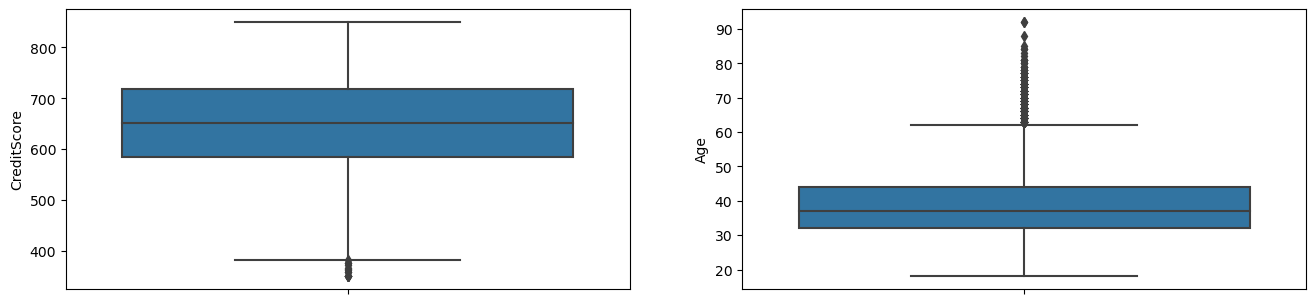

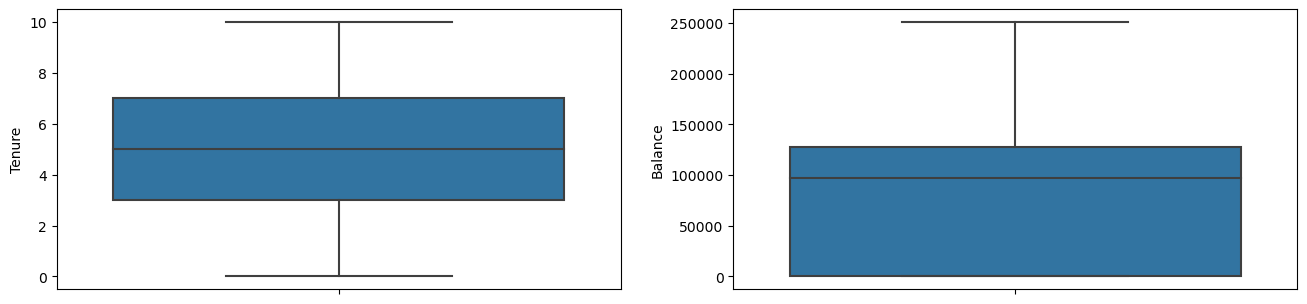

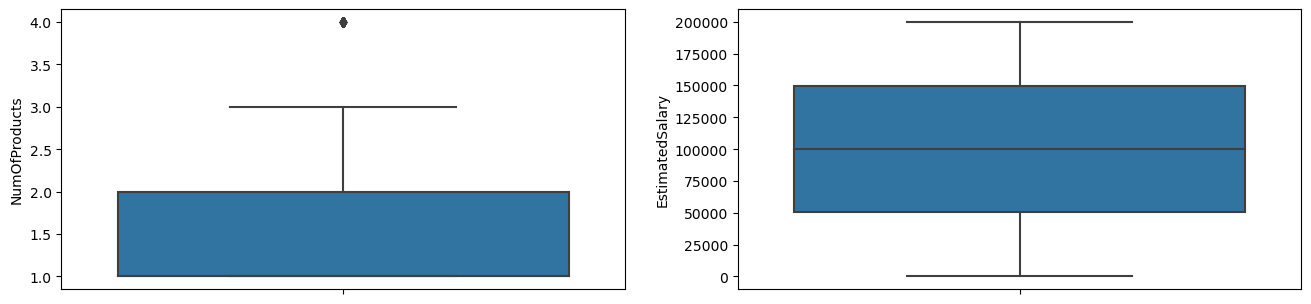

In [26]:
#Checking the outliers with boxplot
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(y = df['CreditScore'])
plt.subplot(2,2,2)
sns.boxplot(y = df['Age'])
plt.show()

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(y = df['Tenure'])
plt.subplot(2,2,2)
sns.boxplot(y = df['Balance'])
plt.show()


plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(y = df['NumOfProducts'])
plt.subplot(2,2,2)
sns.boxplot(y = df['EstimatedSalary'])
plt.show()

In [27]:
#Dealing with the Credit Score outliers with quantiles and statistical method
q1 = df.CreditScore.quantile(0.25)
q3 = df.CreditScore.quantile(0.75)
IQR = q3-q1

lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
print(lower_limit,upper_limit)

383.0 919.0


In [28]:
df[(df["CreditScore"] < lower_limit) | (df['CreditScore'] > upper_limit)]

RowNumber  CustomerId    Surname  CreditScore Geography  Gender   Age  \
7           8.0  15656148.0     Obinna        376.0   Germany  Female  29.0   
942       943.0  15804586.0        Lin        376.0    France  Female  46.0   
1193     1194.0  15779947.0     Thomas        363.0     Spain  Female  28.0   
1405     1406.0  15612494.0  Panicucci        359.0    France  Female  44.0   
1631     1632.0  15685372.0   Azubuike        350.0     Spain    Male  54.0   
1838     1839.0  15758813.0   Campbell        350.0   Germany    Male  39.0   
1962     1963.0  15692416.0  Aikenhead        358.0     Spain  Female  52.0   
2473     2474.0  15679249.0       Chou        351.0   Germany  Female  57.0   
2579     2580.0  15597896.0   Ozoemena        365.0   Germany    Male  30.0   
8154     8155.0  15791533.0     Ch'ien        367.0     Spain    Male  42.0   
8723     8724.0  15803202.0  Onyekachi        350.0    France    Male  51.0   
8762     8763.0  15765173.0        Lin        350.0    France  Female  60.0   
9210     9211.0  15792650.0      Watts        382.0     Spain    Male  36.0   
9356     9357.0  15734711.0     Loggia        373.0    France    Male  42.0   
9624     9625.0  15668309.0     Maslow        350.0    France  Female  40.0   

      Tenure    Balance  NumOfProducts  EstimatedSalary HasCrCard  \
7        4.0  115046.74            4.0        119346.88       Yes   
942      6.0       0.00            1.0        157333.69       Yes   
1193     6.0  146098.43            3.0        100615.14       Yes   
1405     6.0  128747.69            1.0        146955.71       Yes   
1631     1.0  152677.48            1.0        191973.49       Yes   
1838     0.0  109733.20            2.0        123602.11        No   
1962     8.0  143542.36            3.0        141959.11       Yes   
2473     4.0  163146.46            1.0        169621.69       Yes   
2579     0.0  127760.07            1.0         81537.85       Yes   
8154     6.0   93608.28            1.0        168816.73       Yes   
8723    10.0       0.00            1.0        125823.79       Yes   
8762     3.0       0.00            1.0        113796.15        No   
9210     0.0       0.00            1.0        179540.73       Yes   
9356     7.0       0.00            1.0         77786.37       Yes   
9624     0.0  111098.85            1.0        172321.21       Yes   

     IsActiveMember Churn  
7                No   1.0  
942              No   1.0  
1193             No   1.0  
1405             No   1.0  
1631            Yes   1.0  
1838             No   1.0  
1962             No   1.0  
2473             No   1.0  
2579             No   1.0  
8154             No   1.0  
8723            Yes   1.0  
8762             No   1.0  
9210            Yes   1.0  
9356             No   1.0  
9624            Yes   1.0

In [29]:
index_list = df.index[ (df["CreditScore"] < lower_limit) | (df['CreditScore'] > upper_limit) ]
print(index_list, len(index_list))

Index([   7,  942, 1193, 1405, 1631, 1838, 1962, 2473, 2579, 8154, 8723, 8762,
       9210, 9356, 9624],
      dtype='int64') 15


<Axes: ylabel='CreditScore'>

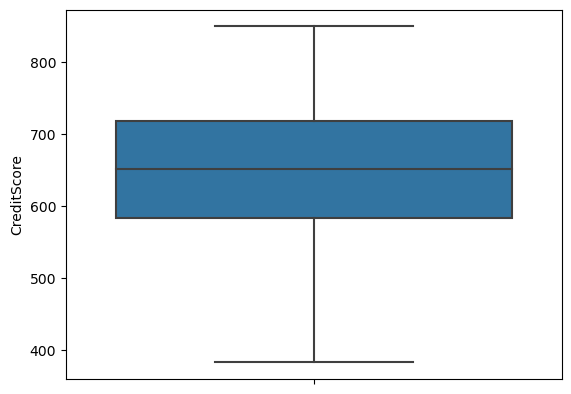

In [30]:
#Capping the CreditScore based on upper limit and lower limit
df["CreditScore"] = np.where (df["CreditScore"] <lower_limit, lower_limit,df['CreditScore'])
df["CreditScore"] = np.where(df["CreditScore"] >upper_limit, upper_limit,df['CreditScore'])
sns.boxplot(y =df["CreditScore"])

In [31]:
#dealing with Age outliers by capping with lower limit and upper limit
q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
IQR = q3-q1

lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
print(lower_limit,upper_limit)

14.0 62.0


In [32]:
index_list = df.index[ (df["Age"] < lower_limit) | (df['Age'] > upper_limit) ]
print(index_list, len(index_list))

Index([  58,   85,  104,  158,  181,  230,  234,  243,  252,  310,
       ...
       9688, 9733, 9734, 9736, 9747, 9753, 9765, 9832, 9894, 9936],
      dtype='int64', length=359) 359


In [33]:
# 359 records is too much to drop I am checking the outliers based on another method (mean and std)
upper_limit2 = df['Age'].mean() + 3*df['Age'].std()
lower_limit2 = df['Age'].mean() - 3*df['Age'].std()
print(lower_limit2,upper_limit2)

7.458380644886226 70.38521935511378


In [34]:
index_list = df.index[ (df["Age"] < lower_limit2) | (df['Age'] > upper_limit2) ]
print(index_list, len(index_list))

Index([  85,  158,  230,  252,  310,  371,  602,  766,  888, 1009,
       ...
       9472, 9490, 9555, 9587, 9589, 9646, 9671, 9736, 9894, 9936],
      dtype='int64', length=133) 133


<Axes: ylabel='Age'>

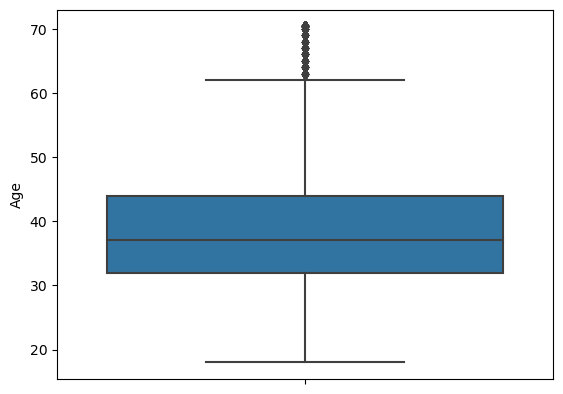

In [35]:
df["Age"] = np.where (df["Age"] <lower_limit2, lower_limit2,df['Age'])
df["Age"] = np.where(df["Age"] >upper_limit2, upper_limit2,df['Age'])
sns.boxplot(y =df["Age"])
# I will like to the keep the remaining data points showing outliers for Age > 62 years

In [36]:
#dealing with Number of products outliers
q1 = df.NumOfProducts.quantile(0.25)
q3 = df.NumOfProducts.quantile(0.75)
IQR = q3-q1

lower_limit = (q1 - 1.5*(q3-q1))
upper_limit = (q3 + 1.5*(q3-q1))
print(lower_limit,upper_limit)

-0.5 3.5


In [37]:
index_list = df.index[ (df["NumOfProducts"] < lower_limit) | (df["NumOfProducts"] > upper_limit) ]
print(index_list, len(index_list))

Index([   7,   70, 1254, 1469, 1488, 1701, 1876, 2124, 2196, 2285, 2462, 2499,
       2509, 2541, 2614, 2617, 2872, 3152, 3365, 3841, 4013, 4014, 4166, 4260,
       4403, 4511, 4516, 4606, 4654, 4748, 4822, 5010, 5137, 5235, 5386, 5700,
       5904, 6150, 6172, 6279, 6750, 6875, 7257, 7457, 7567, 7698, 7724, 7729,
       8041, 8590, 8683, 8850, 8923, 9215, 9255, 9323, 9370, 9411, 9540, 9565],
      dtype='int64') 60


<Axes: ylabel='NumOfProducts'>

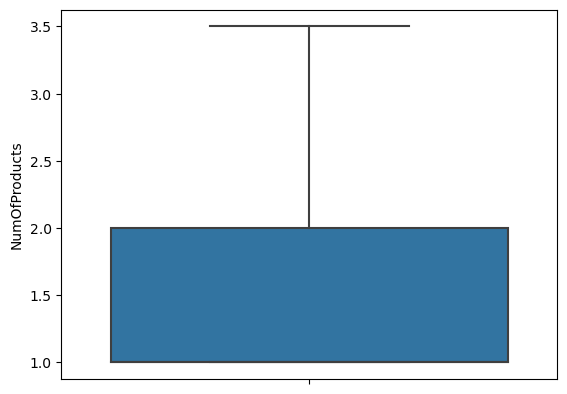

In [38]:
df["NumOfProducts"] = np.where (df["NumOfProducts"] <lower_limit, lower_limit,df["NumOfProducts"])
df["NumOfProducts"] = np.where(df["NumOfProducts"] >upper_limit, upper_limit,df["NumOfProducts"])
sns.boxplot(y =df["NumOfProducts"])

# OBSERVATIONS

From the boxplot, we deduced that there are quite number of outliers that are needed to be dealt with for Creditscore, Age and Number of products

We applied quantile method to cap the outliers for Creditscore and Number of products. But quite significant number of entries that will be affected if the same method is applied to Age, we rather used Mean and std method to deal with the Age outleirs.

Even though we still have few outliers left in the Age variable with this method, but it will be good to see how the older age perform in our model if Age is selected in our features, therefore I will be keeping those records

# Section 2c: countplots for categorical Variables

In [39]:
#Checking the categorical variables
df.columns[df.dtypes == "category"].tolist()

['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Churn']

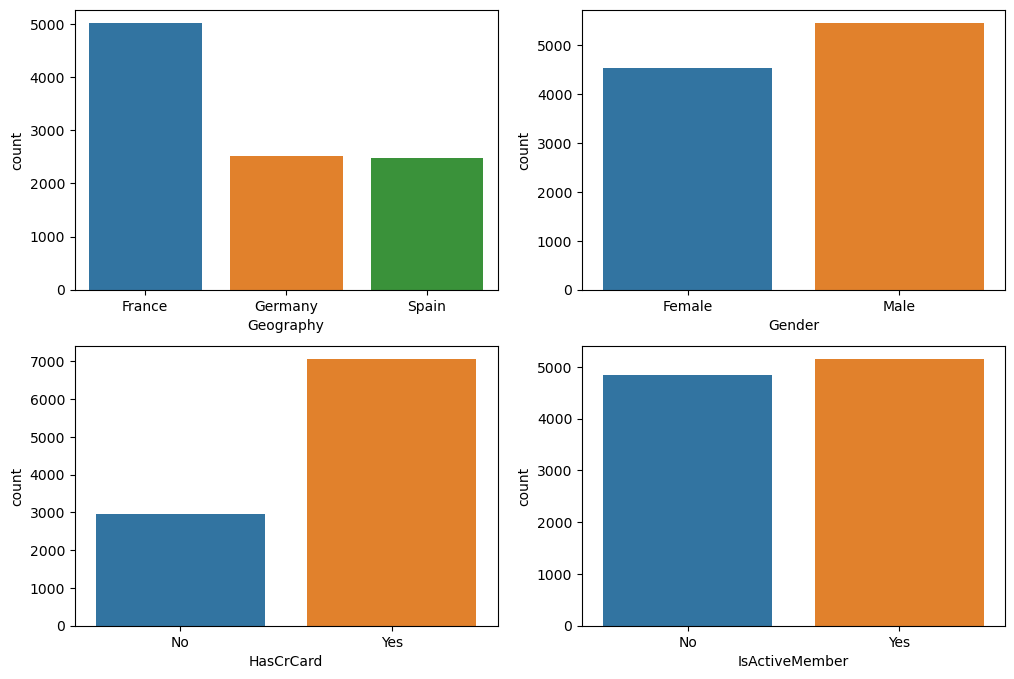

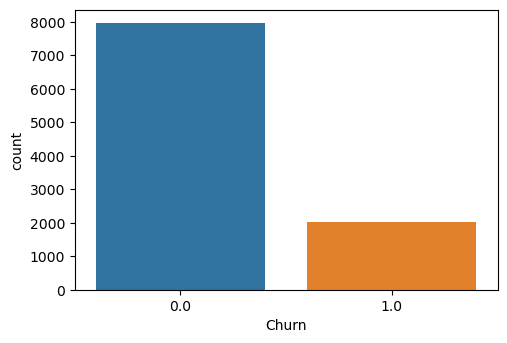

In [40]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(x= "Geography", data = df)
plt.subplot(2,2,2)
sns.countplot(x= "Gender", data = df)
plt.subplot(2,2,3)
sns.countplot(x= "HasCrCard", data = df)
plt.subplot(2,2,4)
sns.countplot(x= "IsActiveMember", data = df)
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(x= "Churn", data = df)
plt.show()

# OBSERVATIONS

From the countplots below, we can deduce that the churn rate is significantly low, also the credit card customers is significatnly high, the number of customers coming from Spain is also significantly higher than Germany and France 

# Section 2d: Computing Histogram and Skewness for the numeric Freatures

In [41]:
df.columns[df.dtypes == "float"].tolist()

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary']

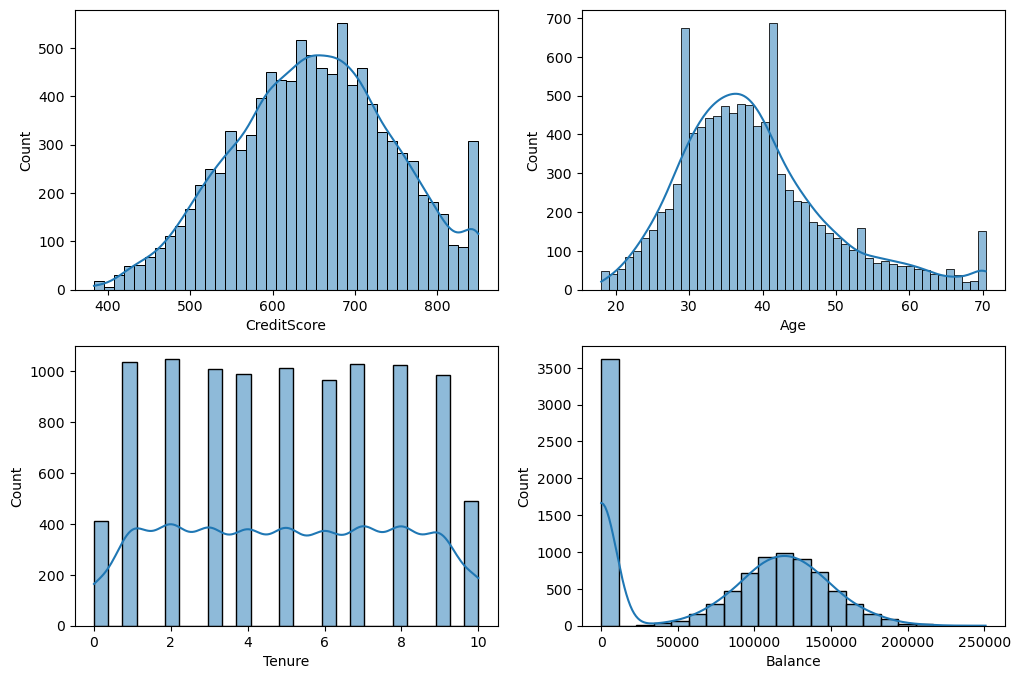

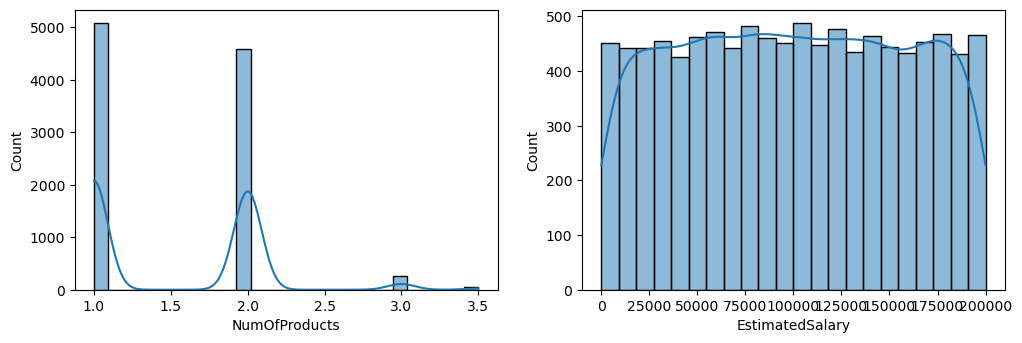

In [42]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(x= "CreditScore", data = df, kde = True)
plt.subplot(2,2,2)
sns.histplot(x= "Age", data = df, kde = True)
plt.subplot(2,2,3)
sns.histplot(x= "Tenure", data = df, kde = True)
plt.subplot(2,2,4)
sns.histplot(x= "Balance", data = df, kde = True)
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(x= "NumOfProducts", data = df, kde = True)
plt.subplot(2,2,2)
sns.histplot(x= "EstimatedSalary", data = df, kde = True)
plt.show()

In [43]:
#Checking the Skewness
df[['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary']].skew()


CreditScore       -0.064255
Age                0.881407
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.567245
EstimatedSalary    0.002085
dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

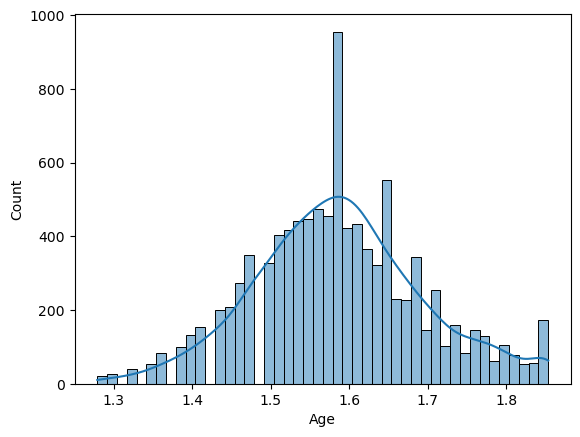

In [44]:
#Transforming Age
Transform_Age = np.log10(df["Age"]+1)
sns.histplot(x= Transform_Age, kde = True)


<Axes: xlabel='NumOfProducts', ylabel='Count'>

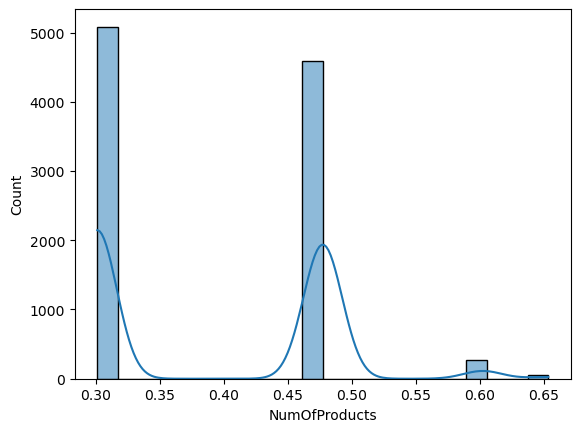

In [45]:
#Transforming Numof Products
Transform_NumOfProducts = np.log10(df["NumOfProducts"]+1)
#Transform_NumOfProducts = np.sqrt(df["NumOfProducts"])
sns.histplot(x= Transform_NumOfProducts, kde = True)

<Axes: xlabel='Balance', ylabel='Count'>

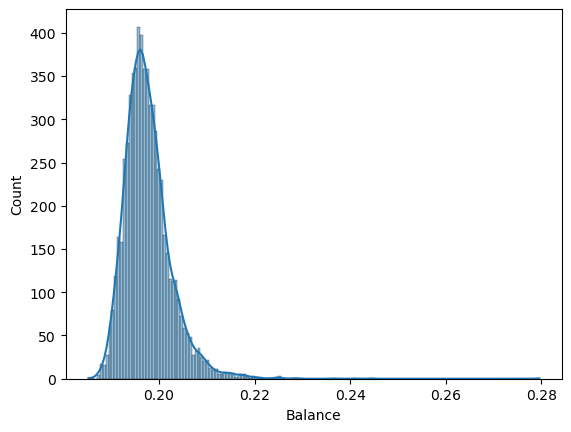

In [46]:
#Transform_Balance = np.log10(max(df["Balance"]+1) - df["Balance"])
#Transform_Balance = 1/(max(df["Balance"]+1) - df["Balance"])
Transform_Balance = 1/(np.log10(df["Balance"]+1))
sns.histplot(x= Transform_Balance, kde = True)

<Axes: xlabel='CreditScore', ylabel='Count'>

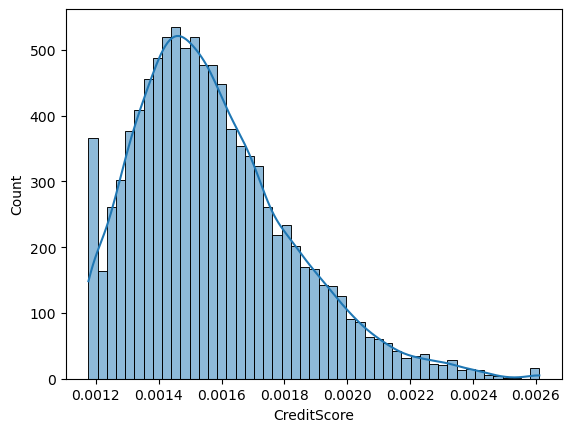

In [47]:
#Transforming CreditScore
#Transform_CreditScore = np.log10(max(df["CreditScore"]+1) - df["CreditScore"])
Transform_CreditScore = 1/(df["CreditScore"])
#Transform_CreditScore = 1/(np.max(df["CreditScore"] +1) - df["CreditScore"])


sns.histplot(x= Transform_CreditScore, kde = True)

In [48]:
# No significant transformation worked for variables Balance and Credit Scroe, therefore I will be keeping the data as it is
# Likewise transformation doesn't change the structure of NumProducts, thereforeWe will only apply tramsformation for Age
df.Age = Transform_Age

In [49]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender       Age  \
0        1.0  15634602.0  Hargrave        619.0    France  Female  1.633468   
1        2.0  15647311.0      Hill        608.0     Spain  Female  1.623249   
2        3.0  15619304.0      Onio        502.0    France  Female  1.633468   
3        4.0  15701354.0      Boni        699.0    France  Female  1.602060   
4        5.0  15737888.0  Mitchell        850.0     Spain  Female  1.643453   

   Tenure    Balance  NumOfProducts  EstimatedSalary HasCrCard IsActiveMember  \
0     2.0       0.00            1.0        101348.88       Yes            Yes   
1     1.0   83807.86            1.0        112542.58        No            Yes   
2     8.0  159660.80            3.0        113931.57       Yes             No   
3     1.0       0.00            2.0         93826.63        No             No   
4     2.0  125510.82            1.0         79084.10       Yes            Yes   

  Churn  
0   1.0  
1   0.0  
2   1.0  
3   0.0  
4   0.0

# OBSERVATION

From The Skewness, it is observed that Age and Number of products are positively Skewed, while credit score and Balance are severely negatively skew, we applied logarithmic transformation on Age.

No significant transformation worked for variables Balance and Credit Scroe, therefore we will be keeping the data as it is
Likewise transformation doesn't change the structure of NumProducts, thereforeWe we only applied tramsformation for Age

# Section 3a: Joint plot with hue:

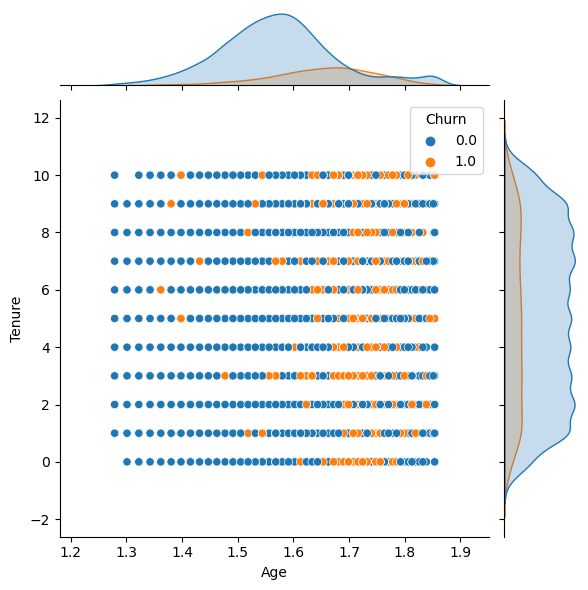

In [50]:
sns.jointplot(data = df, x= 'Age' , y= 'Tenure', hue='Churn' ) 

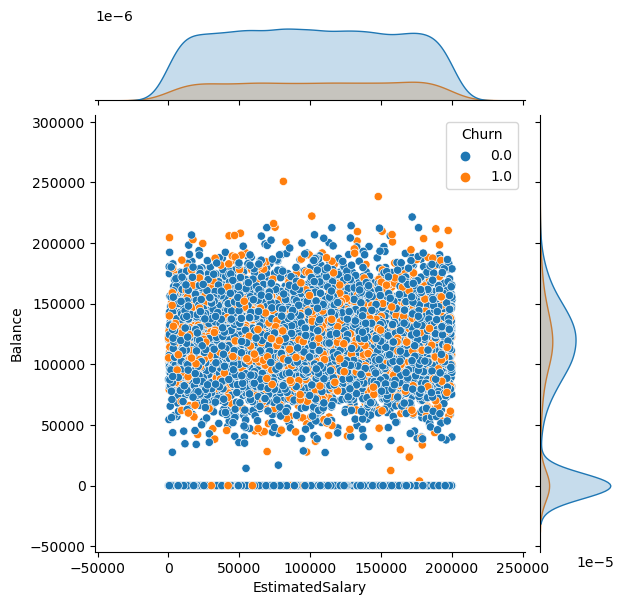

In [51]:
sns.jointplot(data = df, x= "EstimatedSalary" , y=  "Balance" , hue= "Churn" ) 

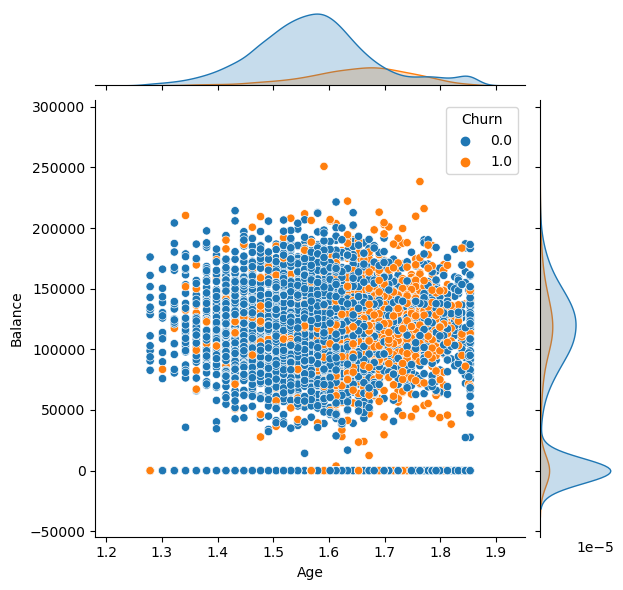

In [52]:
sns.jointplot(data = df, x= 'Age' , y= 'Balance', hue='Churn' ) 

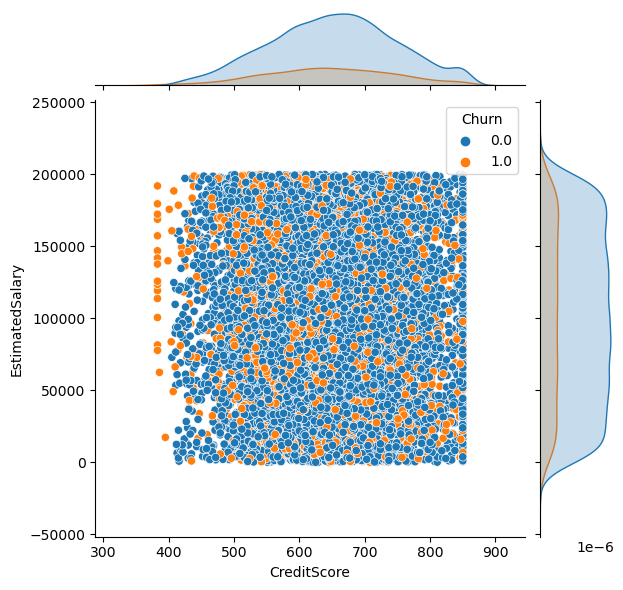

In [53]:
sns.jointplot(data = df, x= 'CreditScore' , y= 'EstimatedSalary', hue='Churn' ) 

# #Section 3b:  scatter plot with hue parameter for same two pairs of variables.

C:\Users\oludare.alatise\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


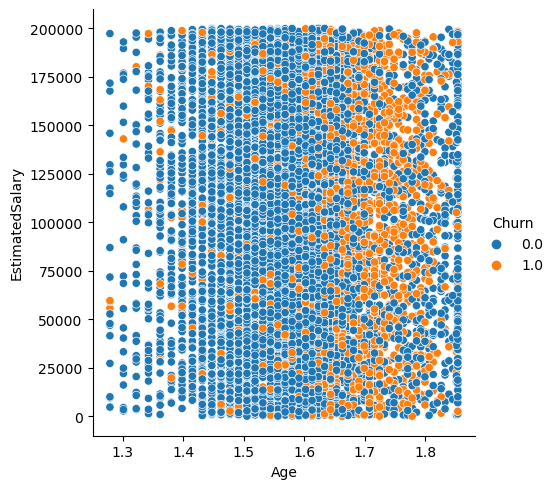

In [54]:
sns.relplot(data = df, x= 'Age' , y= 'EstimatedSalary', hue='Churn' )

C:\Users\oludare.alatise\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


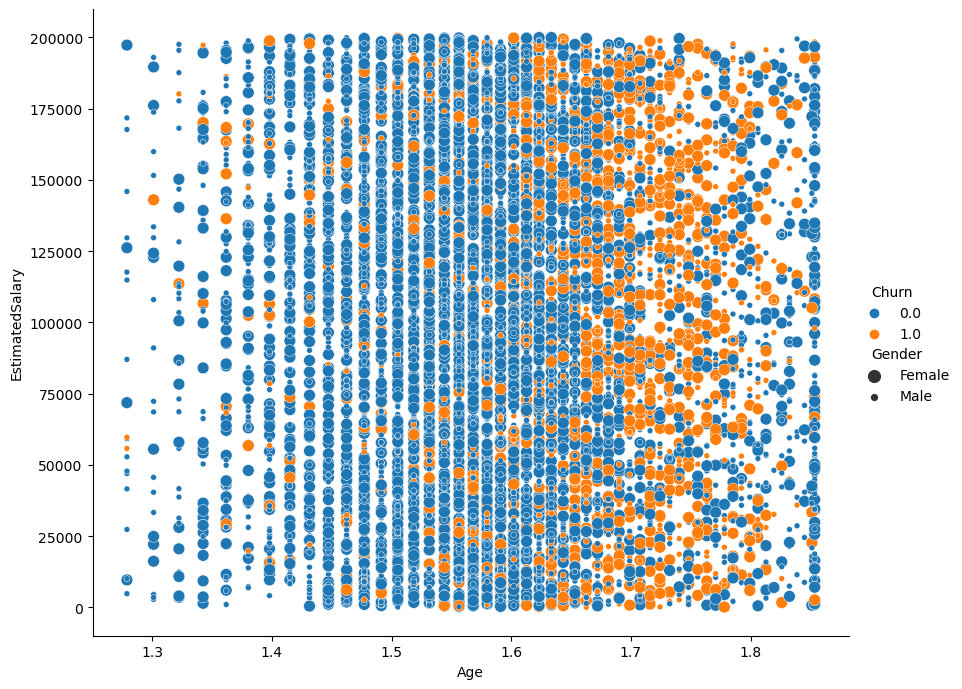

In [55]:
sns.relplot (data=df,x="Age", y="EstimatedSalary",hue='Churn', size='Gender', height = 7, aspect = 1.25)

C:\Users\oludare.alatise\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


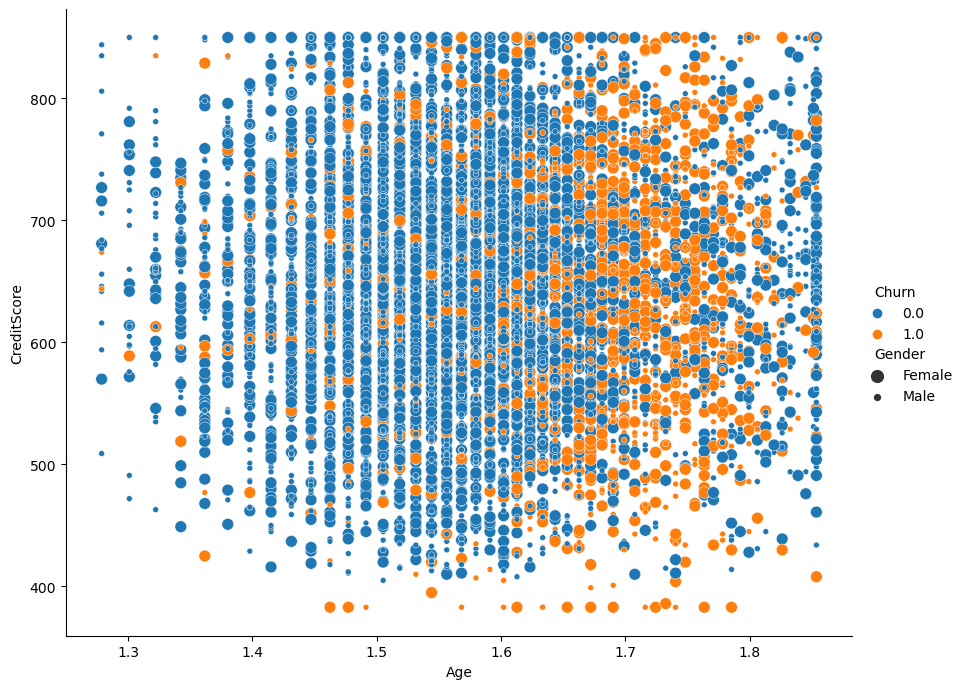

In [56]:
sns.relplot (data=df,x="Age", y="CreditScore",hue='Churn', size='Gender', height = 7, aspect = 1.25)

# Checking relationships with pair plots

C:\Users\oludare.alatise\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


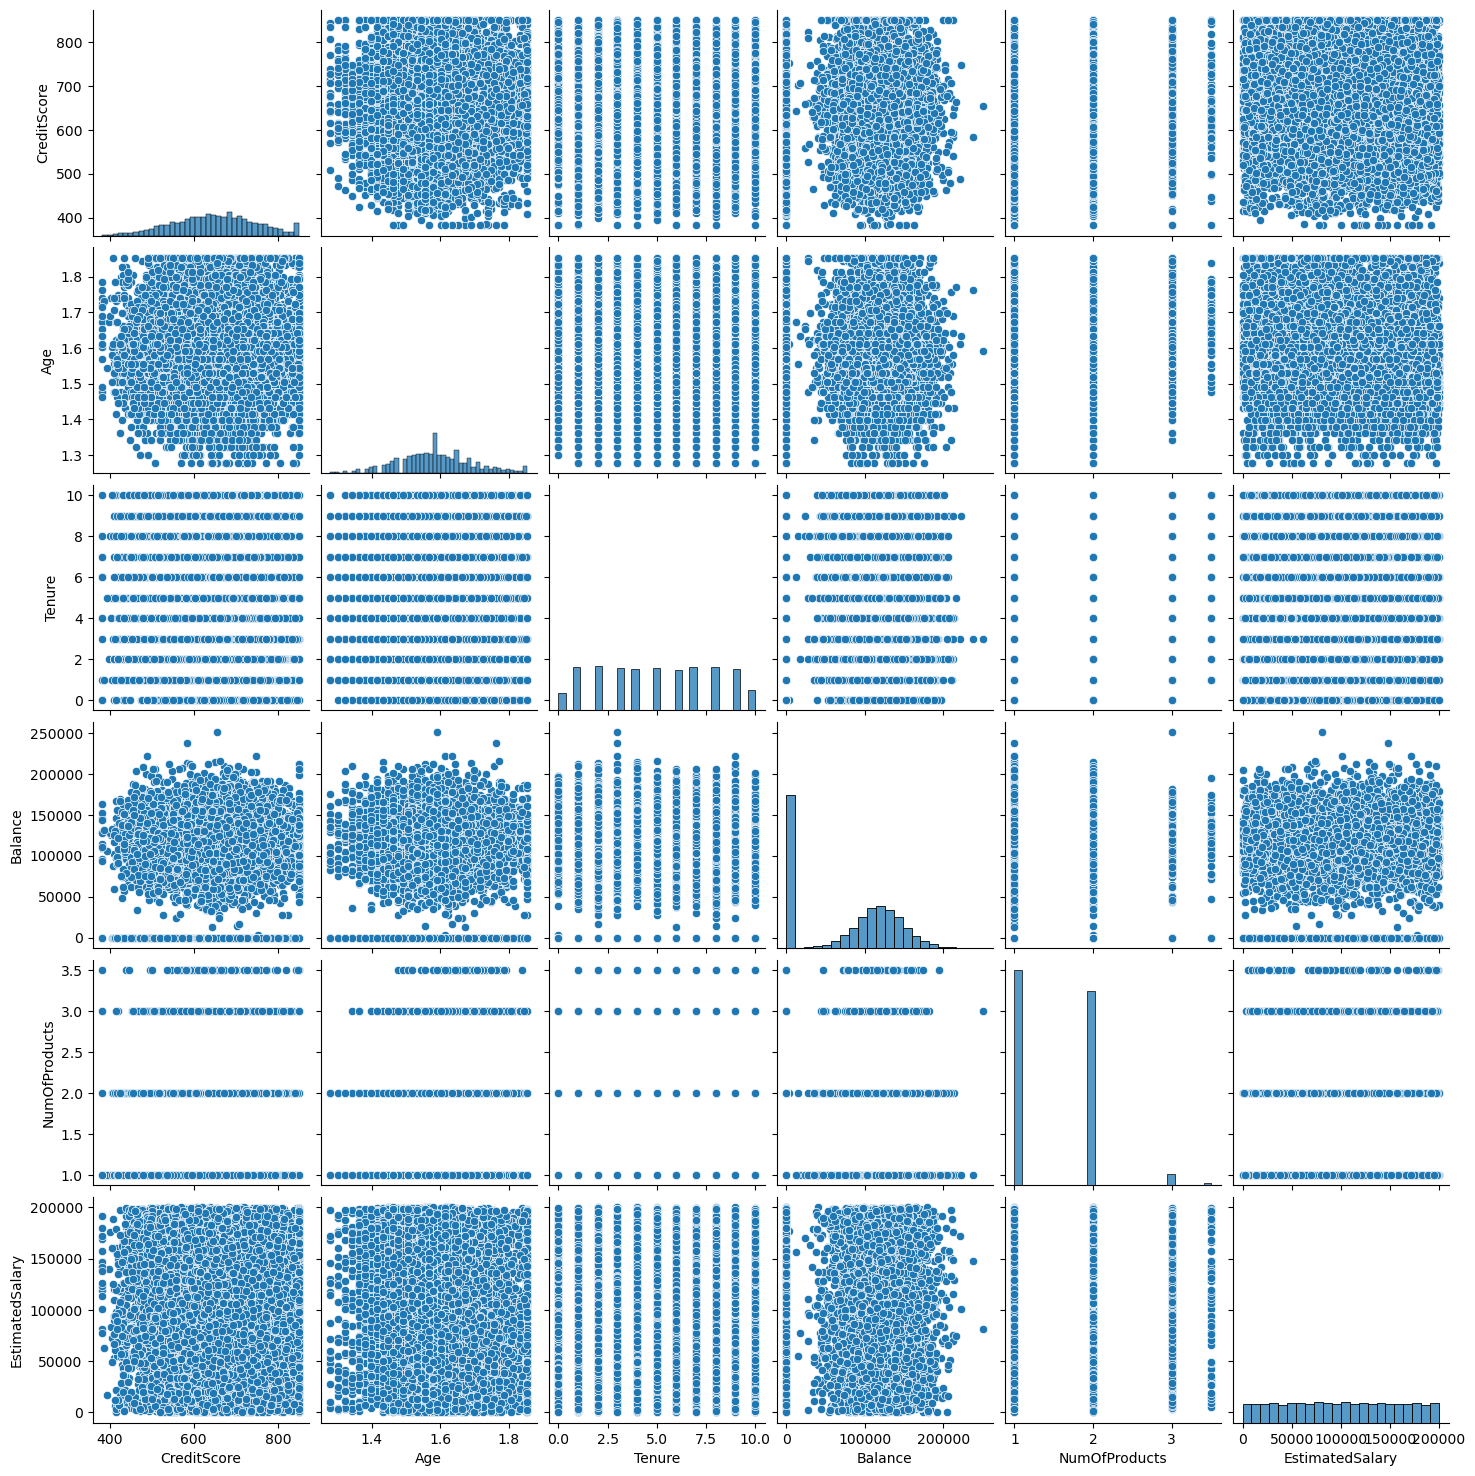

In [57]:
sns.pairplot(df[["CreditScore","Age", 'Tenure','Balance', "NumOfProducts", "EstimatedSalary"]]) 

# OBSERVATION

From the scatter and Joint plot We observed that there is cluster between older ages and churn rate, the older people seems to be churned more compare to younger people 

# Section 3c. Applying scaling for the numeric features

In [58]:
df.columns[df.dtypes == "float"]

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary'],
      dtype='object')

In [59]:
#Scaling with MinMax Scaler
#Please note we wont be considering Identiy variables like RowNum and CustomerID

In [60]:

list_num = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
MinMax = MinMaxScaler().fit_transform(df[list_num])
print(MinMax)

[[0.50535332 0.61705133 0.2        0.         0.         0.50673489]
 [0.48179872 0.59927437 0.1        0.33403148 0.         0.56270874]
 [0.25481799 0.61705133 0.8        0.63635718 0.8        0.56965435]
 ...
 [0.69807281 0.50351528 0.7        0.         0.         0.21039009]
 [0.83297645 0.61705133 0.3        0.29922631 0.4        0.46442905]
 [0.875803   0.31946229 0.4        0.51870777 0.         0.19091423]]


In [61]:
MinMax_Transform = pd.DataFrame(MinMax, columns =list_num  )

In [62]:
print(MinMax_Transform.head())

   CreditScore       Age  Tenure   Balance  NumOfProducts  EstimatedSalary
0     0.505353  0.617051     0.2  0.000000            0.0         0.506735
1     0.481799  0.599274     0.1  0.334031            0.0         0.562709
2     0.254818  0.617051     0.8  0.636357            0.8         0.569654
3     0.676660  0.562414     0.1  0.000000            0.4         0.469120
4     1.000000  0.634420     0.2  0.500246            0.0         0.395400


In [63]:
# Scaling with Robust Scaler

In [64]:
list_num = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
Robust = RobustScaler().fit_transform(df[list_num])
print(Robust)

[[-0.24626866  0.39855551 -0.75       -0.76148003  0.          0.0117391 ]
 [-0.32835821  0.3226886  -1.         -0.10490626  0.          0.12551225]
 [-1.11940299  0.39855551  0.75        0.48934648  2.          0.13962999]
 ...
 [ 0.42537313 -0.08598363  0.5        -0.76148003  0.         -0.59061507]
 [ 0.89552239  0.39855551 -0.5        -0.17331945  1.         -0.07425228]
 [ 1.04477612 -0.87146876 -0.25        0.25809429  0.         -0.63020194]]


In [65]:
Robust_Transform = pd.DataFrame(Robust, columns =list_num  )

In [66]:
print(Robust_Transform.head())

   CreditScore       Age  Tenure   Balance  NumOfProducts  EstimatedSalary
0    -0.246269  0.398556   -0.75 -0.761480            0.0         0.011739
1    -0.328358  0.322689   -1.00 -0.104906            0.0         0.125512
2    -1.119403  0.398556    0.75  0.489346            2.0         0.139630
3     0.350746  0.165380   -1.00 -0.761480            1.0        -0.064717
4     1.477612  0.472678   -0.75  0.221806            0.0        -0.214561


In [67]:
# Scaling with Standard Scaler

In [68]:
list_num = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
Standard = StandardScaler().fit_transform(df[list_num])
print(Standard)

[[-0.32687761  0.42989069 -1.04175968 -1.22584767 -0.92482666  0.02188649]
 [-0.44080365  0.33560185 -1.38753759  0.11735002 -0.92482666  0.21653375]
 [-1.53863634  0.42989069  1.03290776  1.33305335  2.58362046  0.2406869 ]
 ...
 [ 0.60524449 -0.17230373  0.68712986 -1.22584767 -0.92482666 -1.00864308]
 [ 1.25772996  0.42989069 -0.69598177 -0.02260751  0.8293969  -0.12523071]
 [ 1.4648682  -1.14851952 -0.35020386  0.85996499 -0.92482666 -1.07636976]]


In [69]:
Standard_Transform = pd.DataFrame(Standard, columns =list_num  )

In [70]:
print(Standard_Transform.head())

   CreditScore       Age    Tenure   Balance  NumOfProducts  EstimatedSalary
0    -0.326878  0.429891 -1.041760 -1.225848      -0.924827         0.021886
1    -0.440804  0.335602 -1.387538  0.117350      -0.924827         0.216534
2    -1.538636  0.429891  1.032908  1.333053       2.583620         0.240687
3     0.501675  0.140095 -1.387538 -1.225848       0.829397        -0.108918
4     2.065569  0.522012 -1.041760  0.785728      -0.924827        -0.365276


# Section 3c: Endcoding Non Numeric Features

In [71]:
df.columns[df.dtypes != "float"]

Index(['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember',
       'Churn'],
      dtype='object')

In [72]:
# I think its the best we drop all the Idetity varibles like RowNumber, CustomerID and Surname at this stage
df = df.drop(["RowNumber","CustomerId","Surname"], axis=1)

In [73]:
# We want to create a new dataframe for MinMax, Robust and Standard scaler

data_MinMax = pd.get_dummies(df, dtype='int')
data_Robust = pd.get_dummies(df, dtype='int')
data_Standard = pd.get_dummies(df, dtype='int')

In [74]:
#Please note I don't want parform dummy encoding on the churn variable, so I'm dropping Churn_1.0 and Churn_0.0
data_MinMax["Churn"] = df["Churn"]
data_Robust["Churn"] = df["Churn"]
data_Standard["Churn"] = df["Churn"]

data_MinMax = data_MinMax.drop(["Churn_0.0" ,"Churn_1.0"], axis=1)
data_Robust = data_Robust.drop(["Churn_0.0" ,"Churn_1.0"], axis=1)
data_Standard = data_Standard.drop(["Churn_0.0" ,"Churn_1.0"], axis=1)

In [75]:
data_MinMax["Churn"] = data_MinMax["Churn"].astype("int")
data_Robust["Churn"] = data_Robust["Churn"].astype("int")
data_Standard["Churn"] = data_Standard["Churn"].astype("int")

In [76]:
print(data_MinMax.head(5))

   CreditScore       Age  Tenure    Balance  NumOfProducts  EstimatedSalary  \
0        619.0  1.633468     2.0       0.00            1.0        101348.88   
1        608.0  1.623249     1.0   83807.86            1.0        112542.58   
2        502.0  1.633468     8.0  159660.80            3.0        113931.57   
3        699.0  1.602060     1.0       0.00            2.0         93826.63   
4        850.0  1.643453     2.0  125510.82            1.0         79084.10   

   Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                 1                  0                0              1   
1                 0                  0                1              1   
2                 1                  0                0              1   
3                 1                  0                0              1   
4                 0                  0                1              1   

   Gender_Male  HasCrCard_No  HasCrCard_Yes  IsActiveMember_No  \
0            0

In [77]:
data_MinMax.dtypes

CreditScore           float64
Age                   float64
Tenure                float64
Balance               float64
NumOfProducts         float64
EstimatedSalary       float64
Geography_France        int32
Geography_Germany       int32
Geography_Spain         int32
Gender_Female           int32
Gender_Male             int32
HasCrCard_No            int32
HasCrCard_Yes           int32
IsActiveMember_No       int32
IsActiveMember_Yes      int32
Churn                   int32
dtype: object

In [78]:
#Store the Minmax transform dataframe in the original dataframe
for i in MinMax_Transform.columns:
    data_MinMax[i] = MinMax_Transform[i]
data_MinMax

CreditScore       Age  Tenure   Balance  NumOfProducts  EstimatedSalary  \
0        0.505353  0.617051     0.2  0.000000            0.0         0.506735   
1        0.481799  0.599274     0.1  0.334031            0.0         0.562709   
2        0.254818  0.617051     0.8  0.636357            0.8         0.569654   
3        0.676660  0.562414     0.1  0.000000            0.4         0.469120   
4        1.000000  0.634420     0.2  0.500246            0.0         0.395400   
...           ...       ...     ...       ...            ...              ...   
9995     0.830835  0.562414     0.5  0.000000            0.4         0.481341   
9996     0.284797  0.482816     1.0  0.228657            0.0         0.508490   
9997     0.698073  0.503515     0.7  0.000000            0.0         0.210390   
9998     0.832976  0.617051     0.3  0.299226            0.4         0.464429   
9999     0.875803  0.319462     0.4  0.518708            0.0         0.190914   

      Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                    1                  0                0              1   
1                    0                  0                1              1   
2                    1                  0                0              1   
3                    1                  0                0              1   
4                    0                  0                1              1   
...                ...                ...              ...            ...   
9995                 1                  0                0              0   
9996                 1                  0                0              0   
9997                 1                  0                0              1   
9998                 0                  1                0              0   
9999                 1                  0                0              1   

      Gender_Male  HasCrCard_No  HasCrCard_Yes  IsActiveMember_No  \
0               0             0              1                  0   
1               0             1              0                  0   
2               0             0              1                  1   
3               0             1              0                  1   
4               0             0              1                  0   
...           ...           ...            ...                ...   
9995            1             0              1                  1   
9996            1             0              1                  0   
9997            0             1              0                  0   
9998            1             0              1                  1   
9999            0             0              1                  1   

      IsActiveMember_Yes  Churn  
0                      1      1  
1                      1      0  
2                      0      1  
3                      0      0  
4                      1      0  
...                  ...    ...  
9995                   0      0  
9996                   1      0  
9997                   1      1  
9998                   0      1  
9999                   0      0  

[10000 rows x 16 columns]

In [79]:
data_MinMax.shape


(10000, 16)

In [80]:
#Store the Robust transform dataframe in the original dataframe
for i in Robust_Transform.columns:
    data_Robust[i] = Robust_Transform[i]
data_Robust

CreditScore       Age  Tenure   Balance  NumOfProducts  EstimatedSalary  \
0       -0.246269  0.398556   -0.75 -0.761480            0.0         0.011739   
1       -0.328358  0.322689   -1.00 -0.104906            0.0         0.125512   
2       -1.119403  0.398556    0.75  0.489346            2.0         0.139630   
3        0.350746  0.165380   -1.00 -0.761480            1.0        -0.064717   
4        1.477612  0.472678   -0.75  0.221806            0.0        -0.214561   
...           ...       ...     ...       ...            ...              ...   
9995     0.888060  0.165380    0.00 -0.761480            1.0        -0.039876   
9996    -1.014925 -0.174323    1.25 -0.312031            0.0         0.015306   
9997     0.425373 -0.085984    0.50 -0.761480            0.0        -0.590615   
9998     0.895522  0.398556   -0.50 -0.173319            1.0        -0.074252   
9999     1.044776 -0.871469   -0.25  0.258094            0.0        -0.630202   

      Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                    1                  0                0              1   
1                    0                  0                1              1   
2                    1                  0                0              1   
3                    1                  0                0              1   
4                    0                  0                1              1   
...                ...                ...              ...            ...   
9995                 1                  0                0              0   
9996                 1                  0                0              0   
9997                 1                  0                0              1   
9998                 0                  1                0              0   
9999                 1                  0                0              1   

      Gender_Male  HasCrCard_No  HasCrCard_Yes  IsActiveMember_No  \
0               0             0              1                  0   
1               0             1              0                  0   
2               0             0              1                  1   
3               0             1              0                  1   
4               0             0              1                  0   
...           ...           ...            ...                ...   
9995            1             0              1                  1   
9996            1             0              1                  0   
9997            0             1              0                  0   
9998            1             0              1                  1   
9999            0             0              1                  1   

      IsActiveMember_Yes  Churn  
0                      1      1  
1                      1      0  
2                      0      1  
3                      0      0  
4                      1      0  
...                  ...    ...  
9995                   0      0  
9996                   1      0  
9997                   1      1  
9998                   0      1  
9999                   0      0  

[10000 rows x 16 columns]

In [81]:
#Store the Robust transform dataframe in the original dataframe
for i in Standard_Transform.columns:
    data_Standard[i] = Standard_Transform[i]
data_Standard

CreditScore       Age    Tenure   Balance  NumOfProducts  \
0       -0.326878  0.429891 -1.041760 -1.225848      -0.924827   
1       -0.440804  0.335602 -1.387538  0.117350      -0.924827   
2       -1.538636  0.429891  1.032908  1.333053       2.583620   
3        0.501675  0.140095 -1.387538 -1.225848       0.829397   
4        2.065569  0.522012 -1.041760  0.785728      -0.924827   
...           ...       ...       ...       ...            ...   
9995     1.247373  0.140095 -0.004426 -1.225848       0.829397   
9996    -1.393640 -0.282094  1.724464 -0.306379      -0.924827   
9997     0.605244 -0.172304  0.687130 -1.225848      -0.924827   
9998     1.257730  0.429891 -0.695982 -0.022608       0.829397   
9999     1.464868 -1.148520 -0.350204  0.859965      -0.924827   

      EstimatedSalary  Geography_France  Geography_Germany  Geography_Spain  \
0            0.021886                 1                  0                0   
1            0.216534                 0                  0                1   
2            0.240687                 1                  0                0   
3           -0.108918                 1                  0                0   
4           -0.365276                 0                  0                1   
...               ...               ...                ...              ...   
9995        -0.066419                 1                  0                0   
9996         0.027988                 1                  0                0   
9997        -1.008643                 1                  0                0   
9998        -0.125231                 0                  1                0   
9999        -1.076370                 1                  0                0   

      Gender_Female  Gender_Male  HasCrCard_No  HasCrCard_Yes  \
0                 1            0             0              1   
1                 1            0             1              0   
2                 1            0             0              1   
3                 1            0             1              0   
4                 1            0             0              1   
...             ...          ...           ...            ...   
9995              0            1             0              1   
9996              0            1             0              1   
9997              1            0             1              0   
9998              0            1             0              1   
9999              1            0             0              1   

      IsActiveMember_No  IsActiveMember_Yes  Churn  
0                     0                   1      1  
1                     0                   1      0  
2                     1                   0      1  
3                     1                   0      0  
4                     0                   1      0  
...                 ...                 ...    ...  
9995                  1                   0      0  
9996                  0                   1      0  
9997                  0                   1      1  
9998                  1                   0      1  
9999                  1                   0      0  

[10000 rows x 16 columns]

# Section 4B: Compute the correlation among all independent features and visualize it using a heatmap.


In [82]:
Ind_data_MinMax = data_MinMax.drop(["Churn"], axis = 1)
Ind_data_Robust = data_Robust.drop(["Churn"], axis = 1)
Ind_data_Standard = data_Standard.drop(["Churn"], axis = 1)

In [83]:
Ind_data_MinMax.corr()

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore            1.000000 -0.006777  0.000721  0.006389       0.012276   
Age                   -0.006777  1.000000 -0.011499  0.031365      -0.034421   
Tenure                 0.000721 -0.011499  1.000000 -0.012254       0.013194   
Balance                0.006389  0.031365 -0.012254  1.000000      -0.311810   
NumOfProducts          0.012276 -0.034421  0.013194 -0.311810       1.000000   
EstimatedSalary       -0.001150 -0.006329  0.007784  0.012797       0.014065   
Geography_France      -0.008984 -0.042000 -0.002848 -0.231329       0.001445   
Geography_Germany      0.005563  0.049817 -0.000567  0.401110      -0.012440   
Geography_Spain        0.004819 -0.001383  0.003868 -0.134892       0.010820   
Gender_Female          0.002929  0.027570 -0.014733 -0.012087       0.020410   
Gender_Male           -0.002929 -0.027570  0.014733  0.012087      -0.020410   
HasCrCard_No           0.005396  0.011662 -0.022583  0.014858      -0.003504   
HasCrCard_Yes         -0.005396 -0.011662  0.022583 -0.014858       0.003504   
IsActiveMember_No     -0.025537 -0.063396  0.028362  0.010084      -0.010142   
IsActiveMember_Yes     0.025537  0.063396 -0.028362 -0.010084       0.010142   

                    EstimatedSalary  Geography_France  Geography_Germany  \
CreditScore               -0.001150         -0.008984           0.005563   
Age                       -0.006329         -0.042000           0.049817   
Tenure                     0.007784         -0.002848          -0.000567   
Balance                    0.012797         -0.231329           0.401110   
NumOfProducts              0.014065          0.001445          -0.012440   
EstimatedSalary            1.000000         -0.003332           0.010297   
Geography_France          -0.003332          1.000000          -0.580359   
Geography_Germany          0.010297         -0.580359           1.000000   
Geography_Spain           -0.006482         -0.575418          -0.332084   
Gender_Female              0.008112         -0.006772           0.024628   
Gender_Male               -0.008112          0.006772          -0.024628   
HasCrCard_No               0.009933         -0.002467          -0.010577   
HasCrCard_Yes             -0.009933          0.002467           0.010577   
IsActiveMember_No          0.011421         -0.003317           0.020486   
IsActiveMember_Yes        -0.011421          0.003317          -0.020486   

                    Geography_Spain  Gender_Female  Gender_Male  HasCrCard_No  \
CreditScore                0.004819       0.002929    -0.002929      0.005396   
Age                       -0.001383       0.027570    -0.027570      0.011662   
Tenure                     0.003868      -0.014733     0.014733     -0.022583   
Balance                   -0.134892      -0.012087     0.012087      0.014858   
NumOfProducts              0.010820       0.020410    -0.020410     -0.003504   
EstimatedSalary           -0.006482       0.008112    -0.008112      0.009933   
Geography_France          -0.575418      -0.006772     0.006772     -0.002467   
Geography_Germany         -0.332084       0.024628    -0.024628     -0.010577   
Geography_Spain            1.000000      -0.016889     0.016889      0.013480   
Gender_Female             -0.016889       1.000000    -1.000000      0.005766   
Gender_Male                0.016889      -1.000000     1.000000     -0.005766   
HasCrCard_No               0.013480       0.005766    -0.005766      1.000000   
HasCrCard_Yes             -0.013480      -0.005766     0.005766     -1.000000   
IsActiveMember_No         -0.016732       0.022544    -0.022544     -0.011866   
IsActiveMember_Yes         0.016732      -0.022544     0.022544      0.011866   

                    HasCrCard_Yes  IsActiveMember_No  IsActiveMember_Yes  
CreditScore             -0.005396          -0.025537            0.025537  
Age                     -0.011662          -0.063396            0.063396  


In [84]:
Ind_data_Robust.corr()

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore            1.000000 -0.006777  0.000721  0.006389       0.012276   
Age                   -0.006777  1.000000 -0.011499  0.031365      -0.034421   
Tenure                 0.000721 -0.011499  1.000000 -0.012254       0.013194   
Balance                0.006389  0.031365 -0.012254  1.000000      -0.311810   
NumOfProducts          0.012276 -0.034421  0.013194 -0.311810       1.000000   
EstimatedSalary       -0.001150 -0.006329  0.007784  0.012797       0.014065   
Geography_France      -0.008984 -0.042000 -0.002848 -0.231329       0.001445   
Geography_Germany      0.005563  0.049817 -0.000567  0.401110      -0.012440   
Geography_Spain        0.004819 -0.001383  0.003868 -0.134892       0.010820   
Gender_Female          0.002929  0.027570 -0.014733 -0.012087       0.020410   
Gender_Male           -0.002929 -0.027570  0.014733  0.012087      -0.020410   
HasCrCard_No           0.005396  0.011662 -0.022583  0.014858      -0.003504   
HasCrCard_Yes         -0.005396 -0.011662  0.022583 -0.014858       0.003504   
IsActiveMember_No     -0.025537 -0.063396  0.028362  0.010084      -0.010142   
IsActiveMember_Yes     0.025537  0.063396 -0.028362 -0.010084       0.010142   

                    EstimatedSalary  Geography_France  Geography_Germany  \
CreditScore               -0.001150         -0.008984           0.005563   
Age                       -0.006329         -0.042000           0.049817   
Tenure                     0.007784         -0.002848          -0.000567   
Balance                    0.012797         -0.231329           0.401110   
NumOfProducts              0.014065          0.001445          -0.012440   
EstimatedSalary            1.000000         -0.003332           0.010297   
Geography_France          -0.003332          1.000000          -0.580359   
Geography_Germany          0.010297         -0.580359           1.000000   
Geography_Spain           -0.006482         -0.575418          -0.332084   
Gender_Female              0.008112         -0.006772           0.024628   
Gender_Male               -0.008112          0.006772          -0.024628   
HasCrCard_No               0.009933         -0.002467          -0.010577   
HasCrCard_Yes             -0.009933          0.002467           0.010577   
IsActiveMember_No          0.011421         -0.003317           0.020486   
IsActiveMember_Yes        -0.011421          0.003317          -0.020486   

                    Geography_Spain  Gender_Female  Gender_Male  HasCrCard_No  \
CreditScore                0.004819       0.002929    -0.002929      0.005396   
Age                       -0.001383       0.027570    -0.027570      0.011662   
Tenure                     0.003868      -0.014733     0.014733     -0.022583   
Balance                   -0.134892      -0.012087     0.012087      0.014858   
NumOfProducts              0.010820       0.020410    -0.020410     -0.003504   
EstimatedSalary           -0.006482       0.008112    -0.008112      0.009933   
Geography_France          -0.575418      -0.006772     0.006772     -0.002467   
Geography_Germany         -0.332084       0.024628    -0.024628     -0.010577   
Geography_Spain            1.000000      -0.016889     0.016889      0.013480   
Gender_Female             -0.016889       1.000000    -1.000000      0.005766   
Gender_Male                0.016889      -1.000000     1.000000     -0.005766   
HasCrCard_No               0.013480       0.005766    -0.005766      1.000000   
HasCrCard_Yes             -0.013480      -0.005766     0.005766     -1.000000   
IsActiveMember_No         -0.016732       0.022544    -0.022544     -0.011866   
IsActiveMember_Yes         0.016732      -0.022544     0.022544      0.011866   

                    HasCrCard_Yes  IsActiveMember_No  IsActiveMember_Yes  
CreditScore             -0.005396          -0.025537            0.025537  
Age                     -0.011662          -0.063396            0.063396  


In [85]:
Ind_data_Standard.corr()

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore            1.000000 -0.006777  0.000721  0.006389       0.012276   
Age                   -0.006777  1.000000 -0.011499  0.031365      -0.034421   
Tenure                 0.000721 -0.011499  1.000000 -0.012254       0.013194   
Balance                0.006389  0.031365 -0.012254  1.000000      -0.311810   
NumOfProducts          0.012276 -0.034421  0.013194 -0.311810       1.000000   
EstimatedSalary       -0.001150 -0.006329  0.007784  0.012797       0.014065   
Geography_France      -0.008984 -0.042000 -0.002848 -0.231329       0.001445   
Geography_Germany      0.005563  0.049817 -0.000567  0.401110      -0.012440   
Geography_Spain        0.004819 -0.001383  0.003868 -0.134892       0.010820   
Gender_Female          0.002929  0.027570 -0.014733 -0.012087       0.020410   
Gender_Male           -0.002929 -0.027570  0.014733  0.012087      -0.020410   
HasCrCard_No           0.005396  0.011662 -0.022583  0.014858      -0.003504   
HasCrCard_Yes         -0.005396 -0.011662  0.022583 -0.014858       0.003504   
IsActiveMember_No     -0.025537 -0.063396  0.028362  0.010084      -0.010142   
IsActiveMember_Yes     0.025537  0.063396 -0.028362 -0.010084       0.010142   

                    EstimatedSalary  Geography_France  Geography_Germany  \
CreditScore               -0.001150         -0.008984           0.005563   
Age                       -0.006329         -0.042000           0.049817   
Tenure                     0.007784         -0.002848          -0.000567   
Balance                    0.012797         -0.231329           0.401110   
NumOfProducts              0.014065          0.001445          -0.012440   
EstimatedSalary            1.000000         -0.003332           0.010297   
Geography_France          -0.003332          1.000000          -0.580359   
Geography_Germany          0.010297         -0.580359           1.000000   
Geography_Spain           -0.006482         -0.575418          -0.332084   
Gender_Female              0.008112         -0.006772           0.024628   
Gender_Male               -0.008112          0.006772          -0.024628   
HasCrCard_No               0.009933         -0.002467          -0.010577   
HasCrCard_Yes             -0.009933          0.002467           0.010577   
IsActiveMember_No          0.011421         -0.003317           0.020486   
IsActiveMember_Yes        -0.011421          0.003317          -0.020486   

                    Geography_Spain  Gender_Female  Gender_Male  HasCrCard_No  \
CreditScore                0.004819       0.002929    -0.002929      0.005396   
Age                       -0.001383       0.027570    -0.027570      0.011662   
Tenure                     0.003868      -0.014733     0.014733     -0.022583   
Balance                   -0.134892      -0.012087     0.012087      0.014858   
NumOfProducts              0.010820       0.020410    -0.020410     -0.003504   
EstimatedSalary           -0.006482       0.008112    -0.008112      0.009933   
Geography_France          -0.575418      -0.006772     0.006772     -0.002467   
Geography_Germany         -0.332084       0.024628    -0.024628     -0.010577   
Geography_Spain            1.000000      -0.016889     0.016889      0.013480   
Gender_Female             -0.016889       1.000000    -1.000000      0.005766   
Gender_Male                0.016889      -1.000000     1.000000     -0.005766   
HasCrCard_No               0.013480       0.005766    -0.005766      1.000000   
HasCrCard_Yes             -0.013480      -0.005766     0.005766     -1.000000   
IsActiveMember_No         -0.016732       0.022544    -0.022544     -0.011866   
IsActiveMember_Yes         0.016732      -0.022544     0.022544      0.011866   

                    HasCrCard_Yes  IsActiveMember_No  IsActiveMember_Yes  
CreditScore             -0.005396          -0.025537            0.025537  
Age                     -0.011662          -0.063396            0.063396  


# OBSERVATION

As we can see, Irrespective of the scaling methods used, either MaxMin, Robust or Standard, the correlation among indepedent variables remain the same. What I deduced was that scaling doesn't change the relationship within variables, since the objective of this exercise is not to model but is for us to select feature, I will stick with one of the scaling method(data_MinMax) for the remaning exercises.if the obejective was to model, I would have loved to see the performance of each of the methods(MinMax, Standard and Robust) on the machine learning output

And we also noticed that the dummy encoding/One hot encoding increased the dimension of our data, I would not not want to perform One hot encoding on the churn variable because it's my target variable, which means the stucture of the churn variable was kept just the same way we have it in our initial data. Remember in the Machne Learning, the dimension of y, should always be 1 colmun, it becomes difficut spliting this into 2 columns during scaling, therefore I will be sticking with the current structure of Churn variable( without scaling or transfromation).

In [86]:
#plotting heat maps for the independent variables
Ind_data_MinMax_Corr = Ind_data_MinMax.corr()

<Axes: >

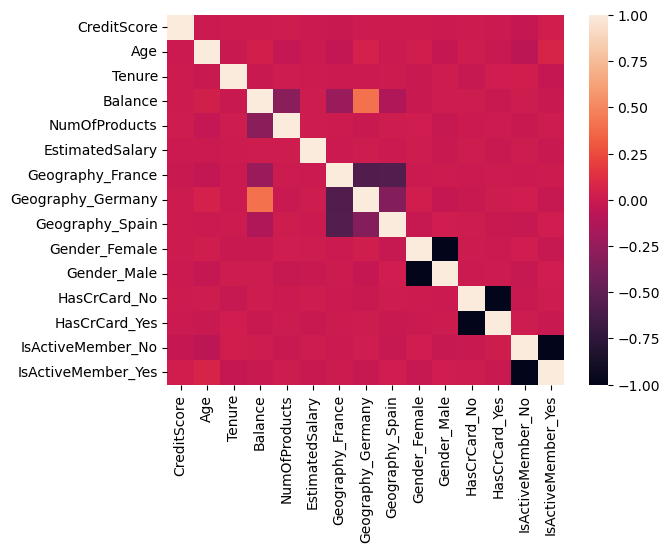

In [87]:
sns.heatmap(Ind_data_MinMax_Corr)

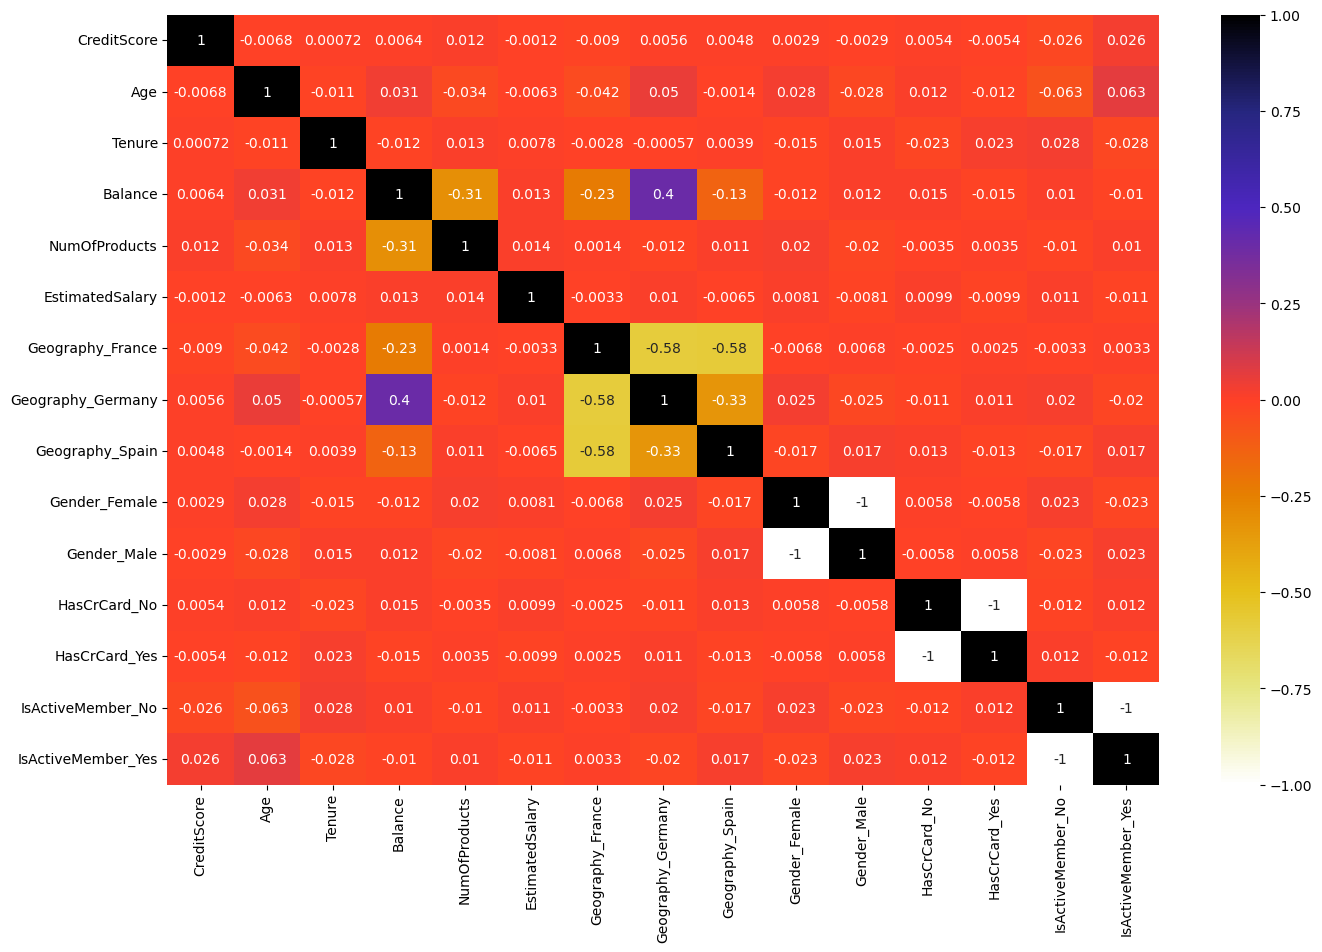

In [88]:

plt.figure(figsize=(16,10))

#plot using heatmap
sns.heatmap(Ind_data_MinMax_Corr, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

# Compute the correlation of each independent feature with the dependent variable ('Churn').

In [89]:
corr_with_Churn = Ind_data_MinMax.corrwith(data_MinMax["Churn"])

In [90]:
print(corr_with_Churn)

CreditScore          -0.026455
Age                   0.297926
Tenure               -0.014001
Balance               0.118533
NumOfProducts        -0.059196
EstimatedSalary       0.012097
Geography_France     -0.104955
Geography_Germany     0.173488
Geography_Spain      -0.052667
Gender_Female         0.106512
Gender_Male          -0.106512
HasCrCard_No          0.007138
HasCrCard_Yes        -0.007138
IsActiveMember_No     0.156128
IsActiveMember_Yes   -0.156128
dtype: float64


# Select the 5 most important independent features based on the correlation with the dependent variable.

In [91]:
selected_features = corr_with_Churn.sort_values(ascending=False).head(5).index.tolist()

In [92]:
print(selected_features)

['Age', 'Geography_Germany', 'IsActiveMember_No', 'Balance', 'Gender_Female']


In [93]:
data_MinMax[selected_features]

Age  Geography_Germany  IsActiveMember_No   Balance  Gender_Female
0     0.617051                  0                  0  0.000000              1
1     0.599274                  0                  0  0.334031              1
2     0.617051                  0                  1  0.636357              1
3     0.562414                  0                  1  0.000000              1
4     0.634420                  0                  0  0.500246              1
...        ...                ...                ...       ...            ...
9995  0.562414                  0                  1  0.000000              0
9996  0.482816                  0                  0  0.228657              0
9997  0.503515                  0                  0  0.000000              1
9998  0.617051                  1                  1  0.299226              0
9999  0.319462                  0                  1  0.518708              1

[10000 rows x 5 columns]

# Section 5a: Treat 'Churn' column as the prediction variable.

In [94]:
## y is dependent variable and X is set of independent variables.


y = data_MinMax['Churn']   

X = data_MinMax.drop(['Churn'], axis = 1)

print(y.shape)
print(X.shape)

(10000,)
(10000, 15)


# Section 5b. Use 80% of the dataset for training

In [95]:
## Split the data into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y,test_size=0.20)  

#verify the shapes of training and testing dataframes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(8000, 15)
(2000, 15)
(8000,)
(2000,)


# Section 5C: Apply feature selection method using SelectKBest() to reduce the dataset  size to 5 features based on their importance for predicting 'Churn'.

In [96]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [97]:
SlectKBest_Regression = SelectKBest(score_func=f_regression, k=5)
X_selected = SlectKBest_Regression.fit_transform(X_train,y_train)

# Get the indices of the selected features
selected_indices = np.argsort(SlectKBest_Regression.scores_)[::-1][:5]
selected_features = X_train.columns[selected_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Age', 'Geography_Germany', 'IsActiveMember_Yes', 'IsActiveMember_No',
       'Balance'],
      dtype='object')


In [98]:
SelectKBest_Chi = SelectKBest(score_func= chi2, k=5)
X_selected = SelectKBest_Chi.fit_transform(X_train,y_train)

# Get the indices of the selected features
selected_indices = np.argsort(SelectKBest_Chi.scores_)[::-1][:5]
selected_features = X_train.columns[selected_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Geography_Germany', 'IsActiveMember_No', 'IsActiveMember_Yes',
       'Gender_Female', 'Age'],
      dtype='object')


In [99]:
SelectKBest_Classif = SelectKBest(score_func= f_classif, k=5)
X_selected = SelectKBest_Classif.fit_transform(X_train,y_train)

# Get the indices of the selected features
selected_indices = np.argsort(SelectKBest_Classif.scores_)[::-1][:5]
selected_features = X_train.columns[selected_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Age', 'Geography_Germany', 'IsActiveMember_Yes', 'IsActiveMember_No',
       'Balance'],
      dtype='object')


# OBSERVATION

What we deduced was that, from the SelectKBest, we have tried 3 score function methods (the regression, Chi2 and Classif), we discovered that Age, Geography_Germany, IsActiveMember are  all common features among the four methods i.e (Correlation, SlectKBest_Regression, SelectKBest_Chi2 and SelectKBest_Classif ).

Since our target variable(Churn) is a categorical variable, I think we can stick with the classification selection for the SelectKBest(SelectKBest_Classif) 

In all, it will be good to see how all these selected features performed in our machine learning model and I cannot wait to kickstart the next journey.

Thanks to everyone who has been part of this development.

Regards,
Oludare Alatise

<h3 style='color:red'> # Comments </h3>
<h4 style='color:red'> 1) Section 1 (10 marks)  </h4>
<h5 style='color:blue'> 
You have addressed most of the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
<br>a. Analyse data types of features and verify they hold data same as that of their 
datatype. Update if required. Process only appropriate ‘object’ columns 
(having categorical data) to ‘category’ type. <br>
----- Analysed data types and converted to appropriate, comments given. <br>
        b. First, check for Nan values in data and then remove null values for ‘Tenure’ column using mean() applied to it.<br>
----- Null values found and replaced with appropriate, comments given. <br>
    <br>
</h5>
<h5 style='color:green'>
<u> Marks scored:  10</u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>

<h4 style='color:red'> 2) Section 2 (20 marks)  </h4>
<h5 style='color:blue'>       Learner has addressed most of the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
<br>a. Check for duplicates, view duplicated rows, and remove them, if any. <br>    
----- Duplicates checked, comment on no duplicates given, good attempt. <br>
<br>b. Check for outliers using boxplot and statistical method, and remove them, if any. <br>    
----- Outliers checked and dealth with properly, good !! Observations written well !! <br>
<br>c. For categorical features, draw countplot. Write your observations. 
    <br>    ----- Countplot for categorical features drawn, commented well.Good Attempt !!<br>
<br>d. For numeric features, draw a histogram.Compute and about skewness of variables and apply transformation function, if needed. <br>
---- The code correctly draws histograms for many features, good comments given on output.<br>
    ----- Excellent attempt of this task. <br>
    <h5 style='color:green'>
<u> Marks scored: 20</u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>
<h4 style='color:red'> 3) Section 3 (20 marks)   </h4>
<h5 style='color:blue'>   Learner has addressed most of the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
<br> a. Come up with joint plot with hue parameter for two pairs of variables. Write your observations from the plot     
<br>---- The provided code creates a joint plot, commented well.    <br>
<br> b. Come up with scatter plot with hue parameter for same two pairs of variables. Write how scatter plot and joint plot are different from each other.Also use of pairplot is not clear.<br>
    ----- Done well, brief comments given and comparision expected.
<br>
            <br>c. Apply any scaling method to for all numeric features.    
<br>---- Scaling done for numeric features, commented well.<br>
<br>d. Process non-numeric features to either delete a column or convert them into numeric ones using appropriate encoding techniques.    
<br>----The code successfully achieves the task of converting non-numeric features into numeric one, you could have tried encoding techniques like one-hot or label<br>
     <br>
    <br>
<h5 style='color:green'>
<u> Marks scored:  18 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>
<h4 style='color:red'> 4) Section 4: (5 marks) </h4>
<h5 style='color:blue'><br>  
<br> Combine results of section 3 (b) and section 3 (c) and then compute correlation among all independent features and demonstrate it using heatmap. Compute correlation of each independent feature with dependent variable ‘Churn’. Select 5 most important independent features from the set. <br>    
<br>----- Attempted well, top 5 feature selection seems missing.<br>

<h5 style='color:green'>                                  
<u> Marks scored: 4 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>

<h4 style='color:red'> 5) Section 5: (5 marks) </h4>
<h5 style='color:blue'> <br>   
<br>Consider ‘Churn’ column is prediction variable. The dataset consists of  19,237 samples and we need to use 80% data for training and use it for feature selection. Apply feature selection method to the dataset using SelectKBest() to reduce the dataset size to 5 features.<br>    
    ----- Perfect attempt!! Observations written well !!<br>

<h5 style='color:green'>
<u> Marks scored: 5 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------

<u> Total Marks scored: 57 </u><br>
    <br>
<b> CONGRATULATIONS!!! One of the best submissions !!<br>
You have successfully completed your capstone project. <br>
You will receive your certificate from the LMS team. </b><br>

-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>

Refer to __[https://scikit-learn.org/stable/modules/feature_selection.html](https://scikit-learn.org/stable/modules/feature_selection.html)__  for more details of Feature Selection.